# Chapter06. 비지도 학습
# Ch06-1. 군집 알고리즘

**비지도 학습** : 타깃이 없을 때 사용하는 머신러닝 알고리즘. 가르쳐주지 않아도 데이터 속에서 학습을 진행.

In [1]:
# 과일 데이터 (사과, 바나나, 파인애플)
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2025-12-21 02:26:25--  https://bit.ly/fruits_300_data
bit.ly (bit.ly) 해석 중... 67.199.248.10, 67.199.248.11
다음으로 연결 중: bit.ly (bit.ly)|67.199.248.10|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 301 Moved Permanently
위치: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [따라감]
--2025-12-21 02:26:25--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
github.com (github.com) 해석 중... 20.200.245.247
다음으로 연결 중: github.com (github.com)|20.200.245.247|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 302 Found
위치: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [따라감]
--2025-12-21 02:26:25--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
raw.githubusercontent.com (raw.githubusercontent.com) 해석 중... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
다음으로 연결 중: raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 200 OK
길이: 3000128 (2.9M) [application/o

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# load() 메서드를 사용하여 넘파이에서 npy 파일을 로드
fruits = np.load('fruits_300.npy')
print(fruits.shape)

(300, 100, 100)


(300, 100, 100) -> (샘플개수, 이미지높이, 이미지너비)

In [5]:
# 첫 번째 이미지의 첫 번째 행 출력
print(fruits[0, 0, :])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


흑백 사진 -> 0~255까지의 정수값을 가짐.

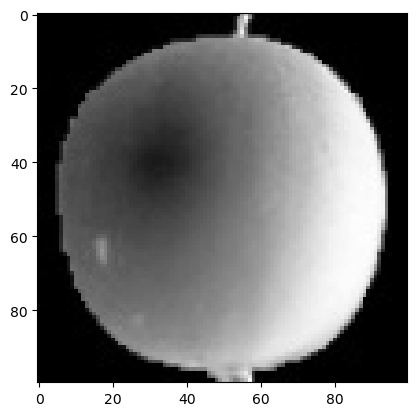

In [6]:
# 넘파이 배열로 저장된 이미지 그리기
plt.imshow(fruits[0], cmap='gray')
plt.show()

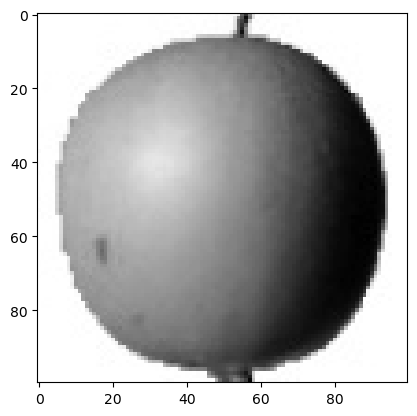

In [7]:
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

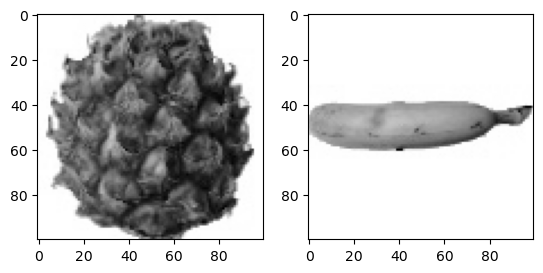

In [ ]:
fig, axs = plt.subplots(1, 2)   # subplots() : 여러 개의 그래프를 배열처럼 쌓을 수 있음.
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

### 픽셀값 분석하기

In [10]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)
print(apple.shape)
print(pineapple.shape)
print(banana.shape)

(100, 10000)
(100, 10000)
(100, 10000)


In [ ]:
# 샘플의 픽셀 평균값 계산
print(apple.mean(axis=1))   # axis=1 : 두번째 축인 열을 따라 계산

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


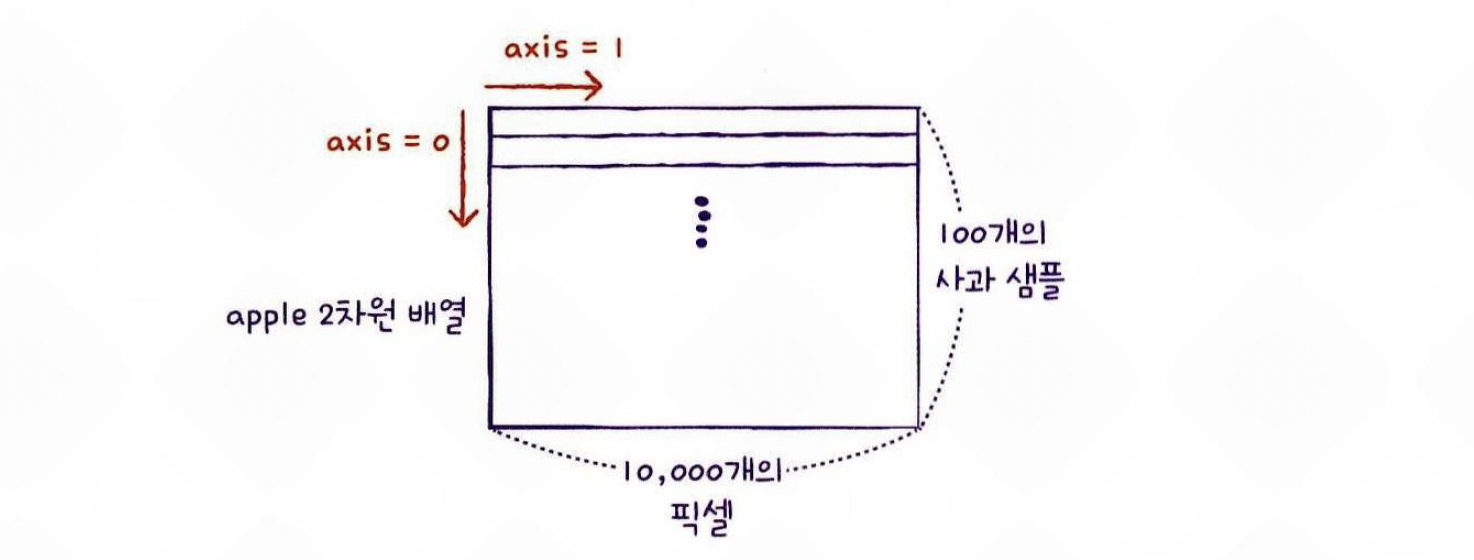

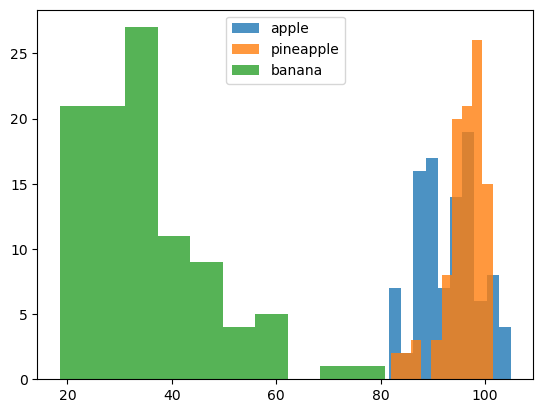

In [16]:
# 히스토그램을 그려서 평균값 분포 확인
# alpha : 투명도 조정
plt.hist(apple.mean(axis=1), alpha=0.8, label='apple')
plt.hist(pineapple.mean(axis=1), alpha=0.8, label='pineapple')
plt.hist(banana.mean(axis=1), alpha=0.8, label='banana')
plt.legend()
plt.show()

banana의 평균값은 40 아래에 집중됨.

사과, 파인애플 -> 90~100

현 상태로는 사과와 파인애플을 구분하기가 어려움.

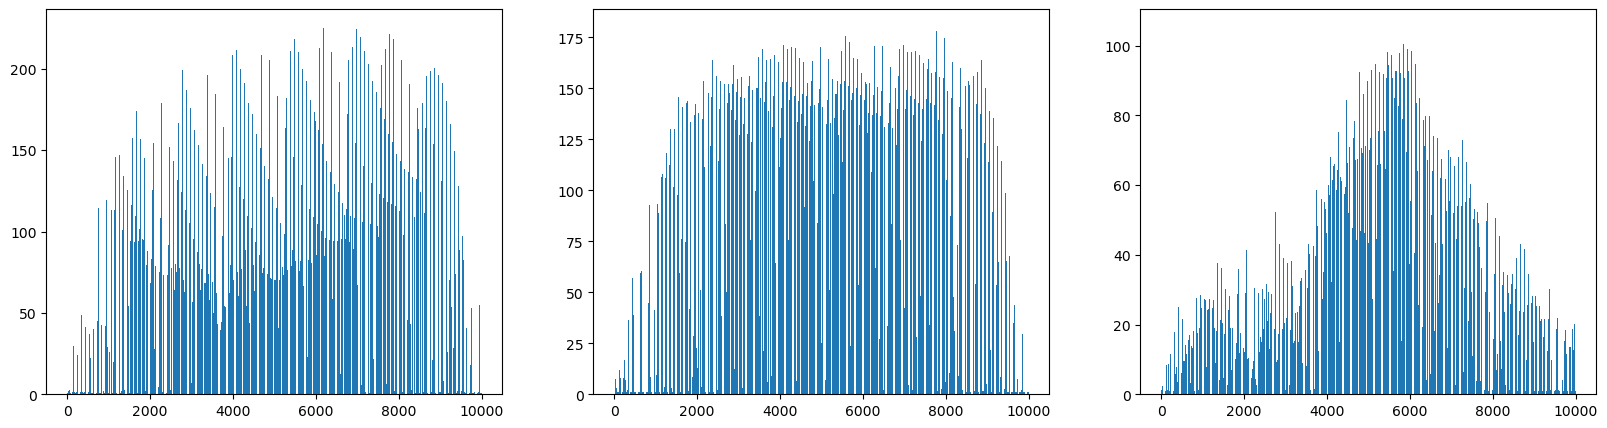

In [17]:
# 픽셀별 평균값 비교
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].bar(range(10000), apple.mean(axis=0))
axs[1].bar(range(10000), pineapple.mean(axis=0))
axs[2].bar(range(10000), banana.mean(axis=0))
plt.show()

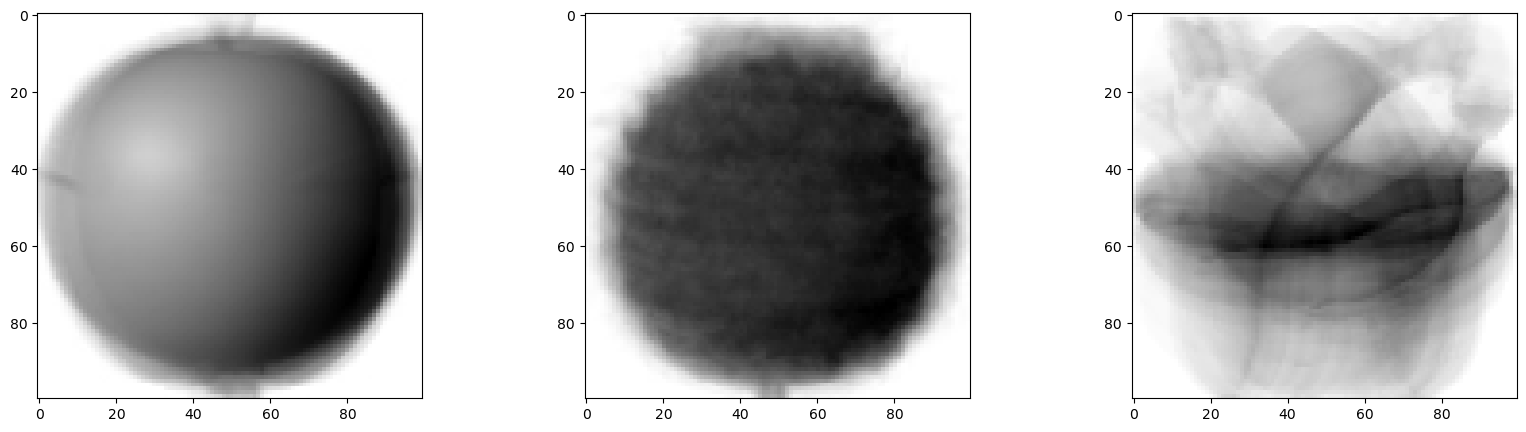

In [18]:
# 픽셀 평균값을 이미지로 변경 -> 모든 사진을 합쳐 놓은 이미지
apple_mean = apple.mean(axis=0).reshape(100, 100)
pineapple_mean = pineapple.mean(axis=0).reshape(100, 100)
banana_mean = banana.mean(axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

### 평균값과 가까운 사진 고르기 (절댓값 오차)

In [ ]:
# fruis 배열에 있는 모든 샘플에서 apple_mean을 뺀 절댓값의 평균을 계산
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

(300,)


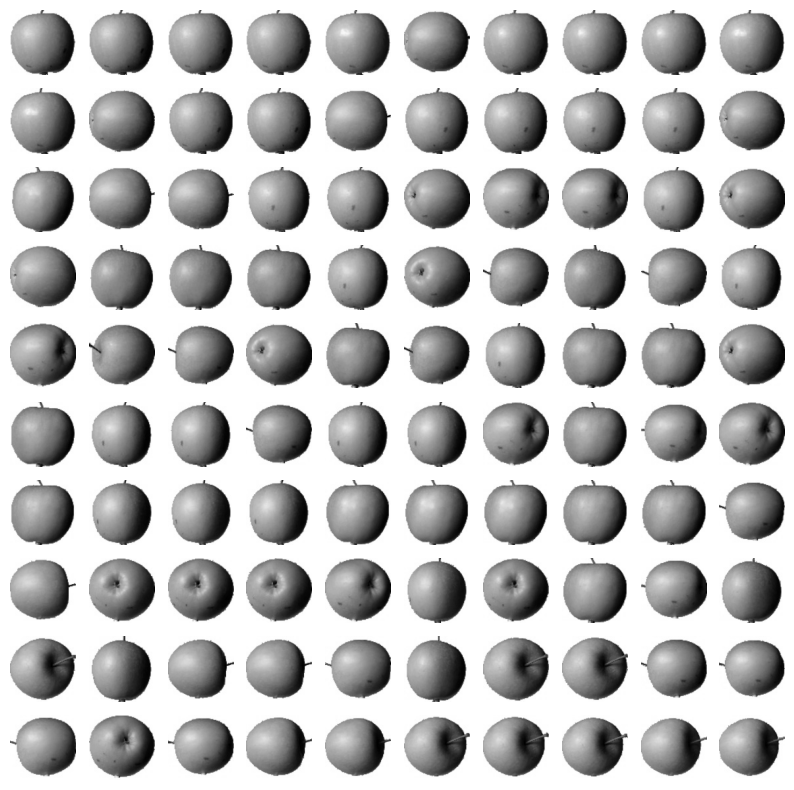

In [ ]:
# apple_mean과 오차가 가장 작은 샘플 100개 고르기
apple_index = np.argsort(abs_mean)[:100]    # np.arsort() : 오름차순 정렬하여 인덱스 반환
apple_index = apple_index.reshape(10, 10)
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i, j]], cmap='gray_r')
        axs[i, j].axis('off')   # 좌표축 그리지 않음.
plt.show()
